In [1]:

import cv2
import numpy as np
import matplotlib.pyplot as plt
import imutils
import cv2
from math import ceil

import sys
sys.path.insert(0,'C:/Users/nguye/OneDrive/Code/auto_mark')
import crop_image

In [2]:
import tensorflow as tf
model = tf.keras.models.load_model('weight.h5')

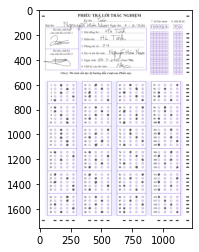

In [3]:
img = cv2.imread('a12.jpg')
plt.imshow(img)

In [4]:
crop = crop_image.crop_image()

In [5]:
a = crop.crop_image_sbd(img)
b = crop.split_blocks_sbd(a)

75933 118769


In [6]:
a1 = crop.crop_image_md(img)
b1 = crop.split_blocks_md(a1)

91773 132069


In [7]:
def preprocessing(img,model):
    img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img_gray = cv2.GaussianBlur(img_gray,(3,3),0)
    ret, im_th = cv2.threshold(img_gray, 179, 255, cv2.THRESH_BINARY_INV)
    roi = cv2.resize(im_th,(28,28),interpolation=cv2.INTER_AREA)
    roi = roi / 255.0
    y = model.predict(roi.reshape(-1,28,28,1))
    return np.argmax(y)

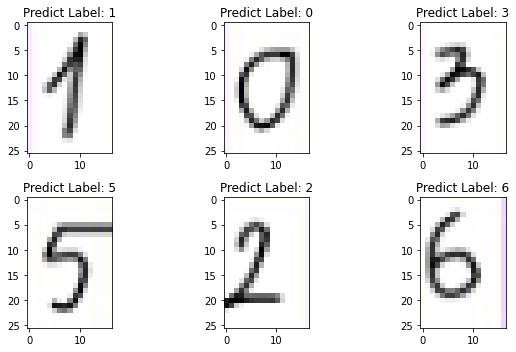

In [8]:
num_row = 2
num_col = 3
fig, axes = plt.subplots(num_row, num_col, figsize=(3*num_col,2.5*num_row))
for i in range(len(b)):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(b[i])
    ax.set_title('Predict Label: {}'.format(preprocessing(b[i],model)))
plt.tight_layout()
plt.show()

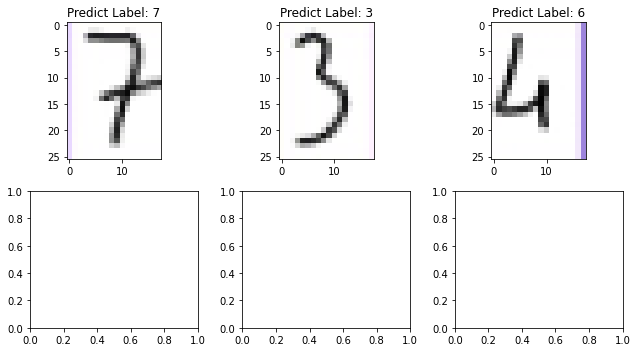

In [9]:
num_row = 2
num_col = 3
fig, axes = plt.subplots(num_row, num_col, figsize=(3*num_col,2.5*num_row))
for i in range(len(b1)):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(b1[i])
    ax.set_title('Predict Label: {}'.format(preprocessing(b1[i],model)))
plt.tight_layout()
plt.show()